In [1]:
# imports
from tueplots import bundles
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tueplots  import figsizes

import sys

%load_ext autoreload
%autoreload 2

sys.path.insert(0, '.')

In [15]:
from analysis import sweep2df, format_violin, RED, BLUE
from care_nl_ica.models.sinkhorn import learn_permutation

In [3]:
plt.rcParams.update(bundles.neurips2022(usetex=True))
plt.rcParams.update({
    'text.latex.preamble': [r'\usepackage{amsfonts}', # mathbb
                            r'\usepackage{amsmath}'] # boldsymbol
})

/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/_collections_abc.py:834: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [4]:
# Constants
ENTITY = "causal-representation-learning"
PROJECT = "nl-causal-representations"

# W&B API
api = wandb.Api(timeout=200)
runs = api.runs(ENTITY + "/" + PROJECT)

# Data loading

In [33]:

SWEEP_ID = "vfv1je0d"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
sweep.runs[59].logged_artifacts()[0].get("dep_mat_table").get_column("dep_mat", "numpy")#.use_artifact("dep_mat_table")
# artifact = run.use_artifact('causal-representation-learning/experiment/run-iczvn8od-dep_mat_table:v0', type='run_table')
# artifact.get("dep_mat_table")

array([[ 1.93882871,  1.40007854,  1.50939941, -1.52444494,  0.01124954,
         0.00467368,  1.57117176,  1.79014182, -0.01026418]])

In [11]:
SWEEP_ID = "gz1yqsuk"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_sweep_{SWEEP_ID}"
print(f"Loading sweep with {SWEEP_ID=}")
df1, (true_unmix_jacobians1, est_unmix_jacobians1, permute_indices1) = sweep2df(sweep.runs, filename, save=True, load=True)

SWEEP_ID = "5gzpzb23"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_sweep_{SWEEP_ID}"
print(f"Loading sweep with {SWEEP_ID=}")
df2, (true_unmix_jacobians2, est_unmix_jacobians2, permute_indices2) = sweep2df(sweep.runs, filename, save=True, load=True)

df = df1.append(df2)
true_unmix_jacobians = true_unmix_jacobians1 +true_unmix_jacobians2
est_unmix_jacobians = est_unmix_jacobians1+est_unmix_jacobians2
permute_indices = permute_indices1+permute_indices2

Loading sweep with SWEEP_ID='gz1yqsuk'
Loading sweep with SWEEP_ID='5gzpzb23'


In [9]:

SWEEP_ID = "nz4r5d8a"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_offset_sweep_{SWEEP_ID}"
print(f"Loading sweep with {SWEEP_ID=}")
df_offset, (true_unmix_jacobians_offset, est_unmix_jacobians_offset, permute_indices_offset) = sweep2df(sweep.runs, filename, save=True, load=True)

Loading sweep with SWEEP_ID='nz4r5d8a'


/Users/patrik.reizinger/Documents/GitHub/nl-causal-representations/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [12]:
SWEEP_ID = "egexc6uw"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"monti_sweep_{SWEEP_ID}"
print(f"Loading sweep with {SWEEP_ID=}")
df_monti, (true_unmix_jacobians_monti, est_unmix_jacobians_monti, permute_indices_monti) = sweep2df(sweep.runs, filename, save=True, load=True)

Loading sweep with SWEEP_ID='egexc6uw'


In [ ]:
SWEEP_ID = "4fnie477"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"nl_sem_sweep_{SWEEP_ID}"
print(f"Loading sweep with {SWEEP_ID=}")
df_nl, (true_unmix_jacobians_nl, est_unmix_jacobians_nl, permute_indices_nl) = sweep2df(sweep.runs, filename, save=True, load=False)

In [22]:
success = []
for (j_gt, j_est, permute) in zip(true_unmix_jacobians_offset, est_unmix_jacobians_offset, permute_indices_offset):
    if j_gt.shape[0]==5:
        success.append(learn_permutation(j_gt, j_est, permute, triu_weigth=20., tril_weight=10.,diag_weight=6., num_steps=5000, lr=1e-4, verbose=True,drop_smallest=True, threshold=None, binary=True))

print("----------------------------------")
print("----------------------------------")
print(f"Success ratio:{np.array(success).mean()}")
print("----------------------------------")
print("----------------------------------")

Correct order identified
Correct order identified
Correct order identified
Correct order identified
Correct order identified
----------------------------------
----------------------------------
Success ratio:1.0
----------------------------------
----------------------------------


In [133]:
success = []
for (mcc, j_gt, j_est, permute) in zip(df_monti.mcc, true_unmix_jacobians_monti, est_unmix_jacobians_monti, permute_indices_monti):
    if mcc > .95:
        success.append(learn_permutation(j_gt, j_est, permute, triu_weigth=25., tril_weight=10.,diag_weight=6., num_steps=3000, lr=1e-3, verbose=True, drop_smallest=True, binary=True))

print("----------------------------------")
print("----------------------------------")
print(f"Success ratio:{np.array(success).mean()}")
print("----------------------------------")
print("----------------------------------")

Correct order identified
Correct order identified
----------------------------------
true_jac=array([[ 1.66666043,  0.        ,  0.        ],
       [-0.29033533, -1.04302919,  0.        ],
       [-0.00611022, -0.02195095, -1.60597253]])
est_jac=tensor([[0., 1., 1.],
        [1., 0., 1.],
        [1., 1., 0.]])
tensor([[0.6667, 0.6667, 0.6667],
        [0.6667, 0.6667, 0.6667],
        [0.6667, 0.6667, 0.6667]])
S_DAG=tensor([[0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333]])
S_ICA=tensor([[0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333]])
----------------------------------
true_jac=array([[ 1.06976736,  0.        ,  0.        ],
       [ 0.24751021, -1.78051484,  0.        ],
       [ 0.        ,  0.        ,  2.0067482 ]])
est_jac=tensor([[1., 1., 0.],
        [0., 1., 1.],
        [1., 0., 1.]])
tensor([[0.6667, 0.6667, 0.6667],
        [0.6667, 0.6667, 0.6667],
        [0.6667, 0.6667, 0.6667]]

KeyboardInterrupt: 

## Data inspection

# Data pre-processing

# Plot

/var/folders/rb/d8k1n6bj4lg801y0yxz4jtbh0000gn/T/ipykernel_75992/4083792918.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0] + sorted(np.log10(moebius_df["gamma_square"]).astype(int).unique()))
/var/folders/rb/d8k1n6bj4lg801y0yxz4jtbh0000gn/T/ipykernel_75992/4083792918.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( xticklabels)


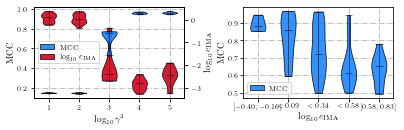

In [243]:
# to make the grid behind both plots: https://stackoverflow.com/a/55618417/16912032

LABELPAD = 2
TICK_PADDING = 2

fig = plt.figure(figsize=figsizes.neurips2022(nrows=1, ncols=2)['figure.figsize'])


"""MCC vs CIMA over different gamma"""
ax = fig.add_subplot(121)
ax.grid(True, which="both", ls="-.")

# create double y-axis
ax_cima = ax.twinx()
ax_mcc = ax.twinx()

# Link the respective y-axes for grid and plot
ax.get_shared_y_axes().join(ax, ax_mcc)

# Remove ticks and labels and set which side to label
ticksoff = dict(labelleft=False, labelright=False, left=False, right=False)
ax.tick_params(axis="y", **ticksoff)
ax_mcc.tick_params(axis="y", labelleft=True, labelright=False, left=True, right=False)
ax_cima.tick_params(axis="y", labelleft=False, labelright=True, left=False, right=True)


# MCC
vp= ax_mcc.violinplot(gg_mcc, showmedians=True)
format_violin(vp,BLUE)
# CIMA
# ax2.set_axisbelow(True)
vp2= ax_cima.violinplot([np.log10(g) for g in gg_cima], showmedians=True)
format_violin(vp2, RED)


ax_cima.set_ylabel("$\log_{10}c_{\mathrm{IMA}}$", labelpad=LABELPAD)
ax.set_ylabel("$\mathrm{MCC}$", labelpad=LABELPAD+17)

ax.set_xlabel("$\log_{10}\gamma^2$", labelpad=LABELPAD)
ax.set_xticklabels([0] + sorted(np.log10(df["gamma_square"]).astype(int).unique()))



plt.legend([vp['bodies'][0], vp2['bodies'][0]], ["$\mathrm{MCC}$", "$\log_{10}c_{\mathrm{IMA}}$"], loc='center left')


"""MCC vs the mixing lin map's CIMA"""
ax = fig.add_subplot(122)
ax.grid(True, which="both", ls="-.")
ax.set_axisbelow(True)

vp = plt.violinplot(moebius_lin_map_groups, showmedians=True)
format_violin(vp)

ax.set_ylabel("$\mathrm{MCC}$", labelpad=LABELPAD)
ax.set_xlabel("$\log_{10}c_{\mathrm{IMA}}$", labelpad=LABELPAD)

xticklabels = [0]+ [f"$[{logbins[0]:.2f};{logbins[1]:.2f})$"]+ [f"$<{logbins[i]:.2f}$" for i in range(2,NUM_BINS-1)] +[f"$[{logbins[-2]:.2f};{logbins[-1]:.2f}]$"]
ax.set_xticklabels( xticklabels)
# plt.legend()
ax.tick_params(axis='both', which='major', pad=TICK_PADDING)
plt.legend([vp['bodies'][0],], ["$\mathrm{MCC}$"], loc='lower left')

plt.savefig("moebius_mcc_cima.svg")

/var/folders/rb/d8k1n6bj4lg801y0yxz4jtbh0000gn/T/ipykernel_75992/2850137678.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(log_gamma_sq[0].astype(int),log_gamma_sq[-1].astype(int)))


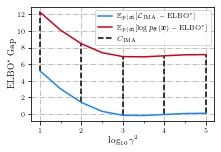

In [257]:
LABELPAD = 1
TICK_PADDING = 2
STD_FACTOR = 3
# plt.rcParams.update(figsizes.neurips2022(nrows=1, ncols=1))
fig = plt.figure(figsize=figsizes.neurips2022(nrows=1, ncols=1.7, rel_width=1)['figure.figsize'])

"""MCC vs CIMA over different gamma"""
ax = fig.add_subplot(121)
ax.grid(True, which="major", ls="-.")
ax.set_axisbelow(True)

ima_elbo = IMA_REG_LOG_LIKELIHOOD - elbo
log_likelihood_elbo = LOG_LIKELIHOOD - elbo
for i in range(0,len(log_gamma_sq),2):
    l = ax.vlines(log_gamma_sq[i], ima_elbo.mean(0)[i], log_likelihood_elbo.mean(0)[i], colors="black", linestyle="--", label=None if i != 0 else r"$C_{\mathrm{IMA}}$")

# L_IMA - ELBO
ax.plot(log_gamma_sq, ima_elbo.mean(0),  label=r"$\mathbb{E}_{p(\boldsymbol{x})}[\mathcal{L}_{\mathrm{IMA}}-\mathrm{ELBO}^*]$", c=BLUE)
# Log-likelihood - ELBO
ax.plot(log_gamma_sq, log_likelihood_elbo.mean(0),  label=r"$\mathbb{E}_{p(\boldsymbol{x})}[\log p_{\boldsymbol{\theta}}(\boldsymbol{x})-\mathrm{ELBO}^*]$", c=RED)

# ax.plot(log_gamma_sq, GLOBAL_CIMA * np.ones_like(log_gamma_sq), label=r"$C_{\mathrm{IMA}}$", c="black", linestyle="--")

ax.set_ylabel(r"$\mathrm{ELBO}^*\ \mathrm{Gap}$", labelpad=LABELPAD)
ax.set_xlabel(r"$\log_{10}\gamma^2$", labelpad=LABELPAD)
plt.legend()

ax.set_xticklabels(range(log_gamma_sq[0].astype(int),log_gamma_sq[-1].astype(int)))


# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '%d' formatting but don't label
# minor ticks.
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(0.5))


plt.savefig("ima_elbo_likelihood.svg")